In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import skimage.color
import skimage.filters
import skimage.io
from skimage.metrics import adapted_rand_error, variation_of_information

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pic1 = cv2.imread('/content/drive/My Drive/Colab_Notebooks/9_2.jpg')
pic1_g = cv2.imread('/content/drive/My Drive/Colab_Notebooks/9_2.jpg',cv2.IMREAD_GRAYSCALE)
pic1_rgb = cv2.cvtColor(pic1, cv2.COLOR_BGR2RGB)
pic2 = cv2.imread('/content/drive/My Drive/Colab_Notebooks/10_2.jpg')
pic2_g = cv2.imread('/content/drive/My Drive/Colab_Notebooks/10_2.jpg',cv2.IMREAD_GRAYSCALE)
pic2_rgb = cv2.cvtColor(pic2, cv2.COLOR_BGR2RGB)

## Edit image

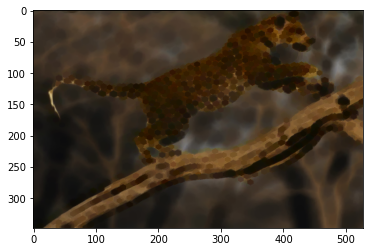

In [ ]:
from skimage.morphology import (erosion, dilation)
rect_kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
fig1 = cv2.erode(pic1_rgb, rect_kernel,iterations = 2)
plt.imshow(fig1)
plt.show()  

Obtained threshold:  88.0


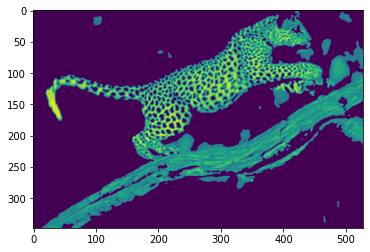

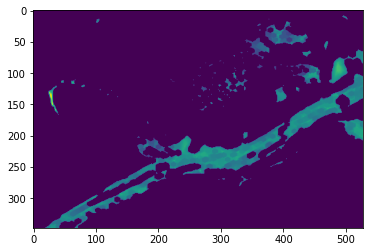

Obtained threshold:  49.0


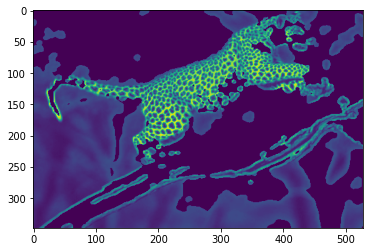

In [ ]:
rect = pic1_g
image = cv2.GaussianBlur(rect, (5, 5), 0)
otsu_threshold, image_result = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU,)
print("Obtained threshold: ", otsu_threshold)

mask = image > otsu_threshold
sel = np.zeros_like(rect)
sel[mask] = rect[mask]
plt.imshow(sel)
plt.show()

fig2 = cv2.erode(sel, rect_kernel,iterations = 2)
plt.imshow(fig2)
plt.show()  


image = cv2.GaussianBlur(cv2.cvtColor(fig1, cv2.COLOR_RGB2GRAY), (5, 5), 0)
otsu_threshold, image_result = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU,)
print("Obtained threshold: ", otsu_threshold)

mask = image < otsu_threshold
sel1 = np.zeros_like(rect)
sel1[mask] = rect[mask]
plt.imshow(sel1)
plt.show()

## k means

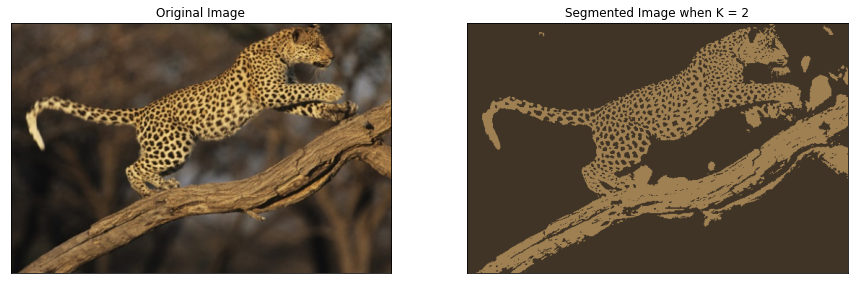

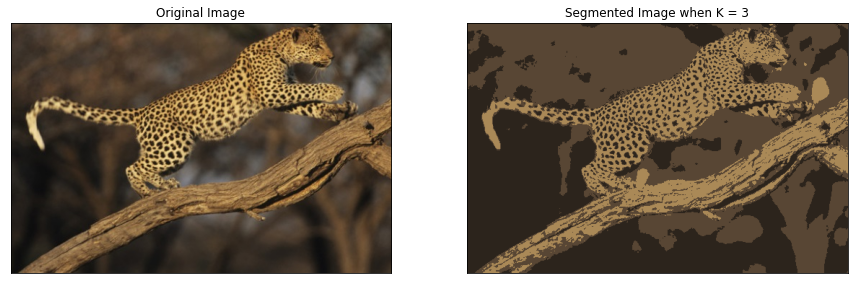

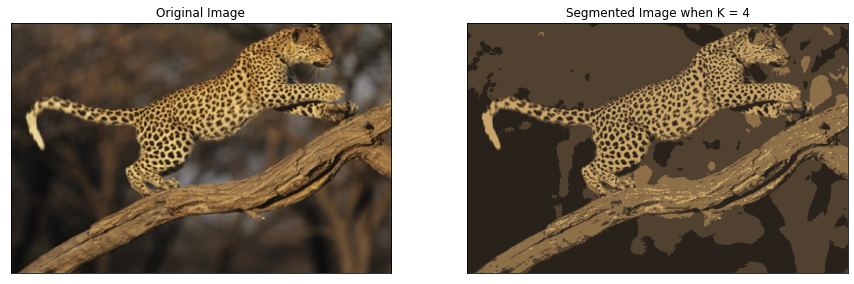

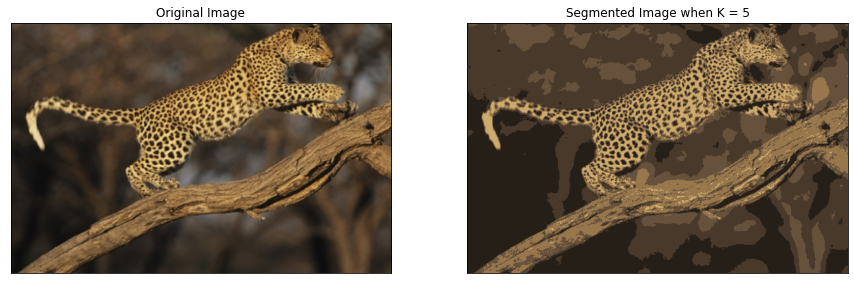

In [ ]:
img=pic1_rgb
vectorized = img.reshape((-1,3))
vectorized = np.float32(vectorized)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
for K in range (2,6):
  attempts=10
  ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
  center = np.uint8(center)
  res = center[label.flatten()]
  result_image = res.reshape((img.shape))
  figure_size = 15
  plt.figure(figsize=(figure_size,figure_size))
  plt.subplot(1,2,1),plt.imshow(img)
  plt.title('Original Image'), plt.xticks([]), plt.yticks([])
  plt.subplot(1,2,2),plt.imshow(result_image)
  plt.title('Segmented Image when K = %i' % K), plt.xticks([]), plt.yticks([])
  plt.show()

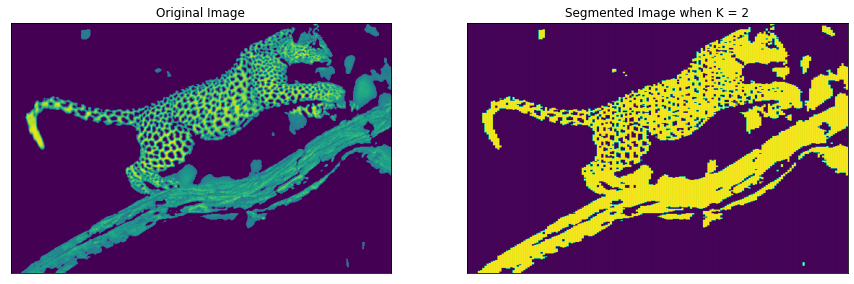

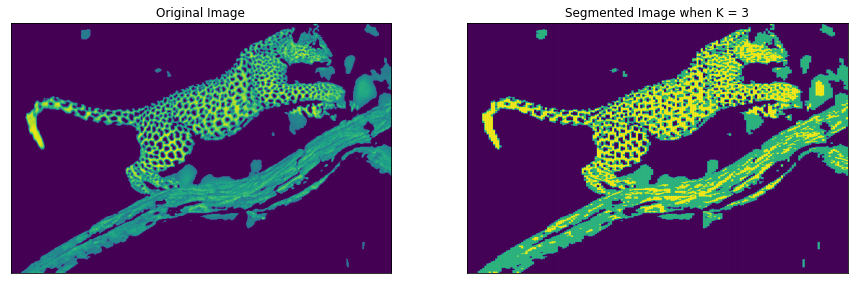

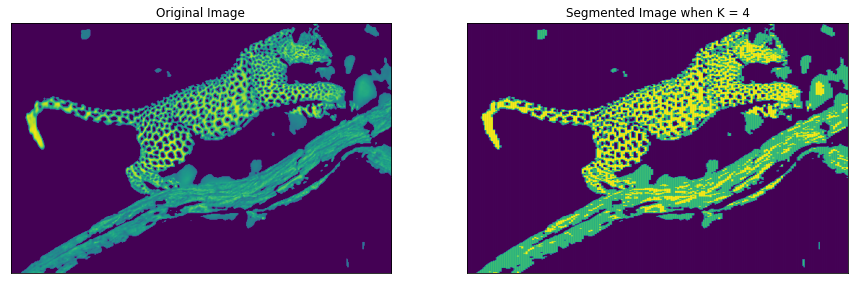

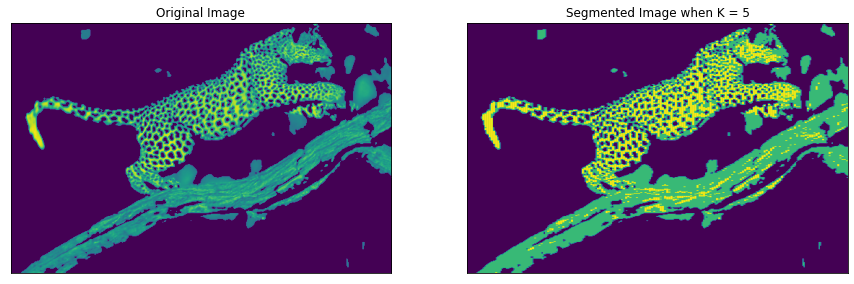

In [ ]:
img=sel
vectorized = img.reshape((-1,3))
vectorized = np.float32(vectorized)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
for K in range (2,6):
  attempts=10
  ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
  center = np.uint8(center)
  res = center[label.flatten()]
  result_image = res.reshape((img.shape))
  figure_size = 15
  plt.figure(figsize=(figure_size,figure_size))
  plt.subplot(1,2,1),plt.imshow(img)
  plt.title('Original Image'), plt.xticks([]), plt.yticks([])
  plt.subplot(1,2,2),plt.imshow(result_image)
  plt.title('Segmented Image when K = %i' % K), plt.xticks([]), plt.yticks([])
  plt.show()

## c-means

In [ ]:
!pip install fuzzy-c-means

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: typer
    Found existing installation: typer 0.4.2
    Uninstalling typer-0.4.2:
      Successfully uninstalled typer-0.4.2


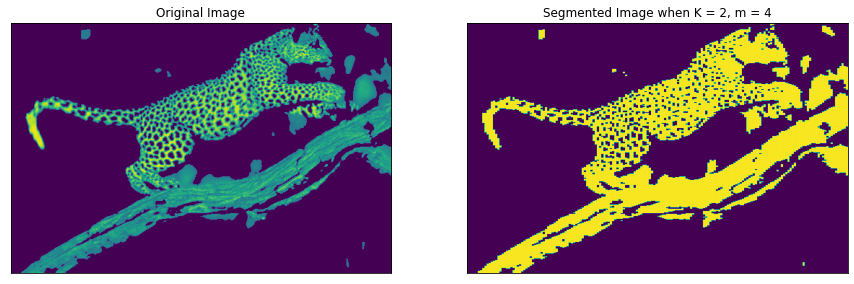

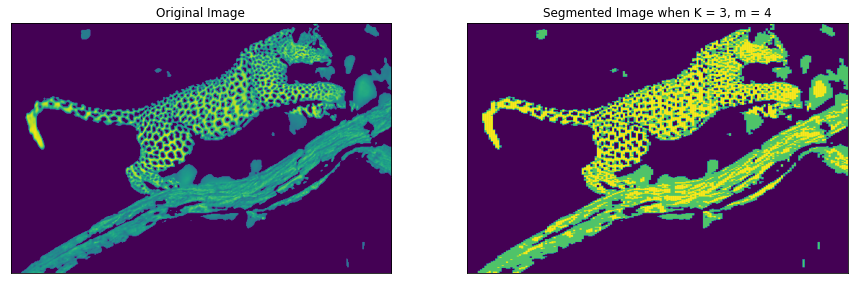

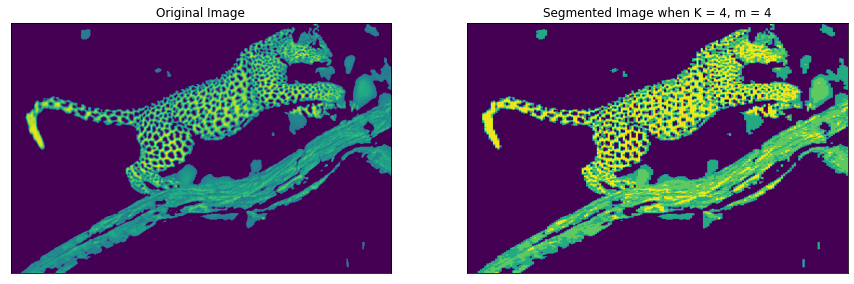

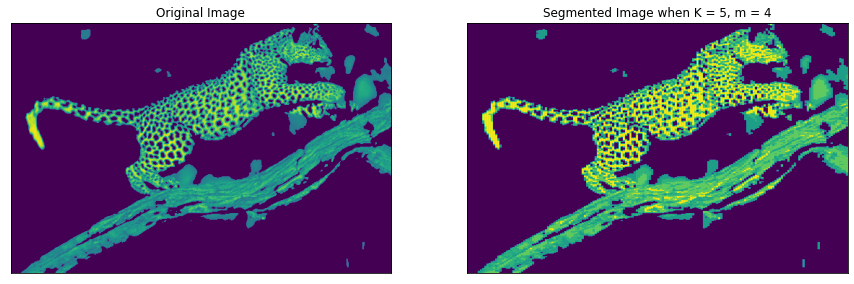

In [ ]:
from fcmeans import FCM
img=sel
vectorized = img.reshape((-1,3))
vectorized = np.float32(vectorized)
m=4
for K in range (2,6):
  cmeans = FCM(m=m, n_clusters=K)
  cmeans.fit(vectorized)
  centers = np.uint8(cmeans.centers)
  res = centers[cmeans.predict(vectorized).flatten()]
  result_image = res.reshape((img.shape))
  figure_size = 15
  plt.figure(figsize=(figure_size,figure_size))
  plt.subplot(1,2,1),plt.imshow(img)
  plt.title('Original Image'), plt.xticks([]), plt.yticks([])
  plt.subplot(1,2,2),plt.imshow(result_image)
  plt.title('Segmented Image when K = {}, m = {}'.format(K,m)), plt.xticks([]), plt.yticks([])
  plt.show()

## Agglomeralte clustering

Number of clusters:  5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'contours'
  from ipykernel import kernelapp as app


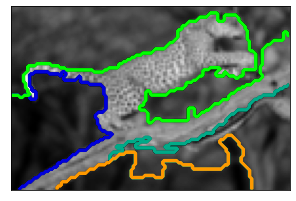

Number of clusters:  10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'contours'
  from ipykernel import kernelapp as app


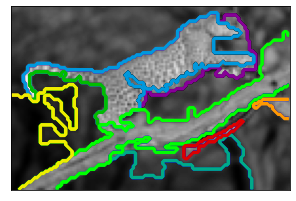

Number of clusters:  15


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'contours'
  from ipykernel import kernelapp as app


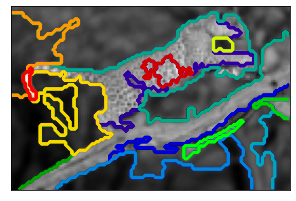

In [ ]:
from sklearn.feature_extraction.image import grid_to_graph
from sklearn.cluster import AgglomerativeClustering
img=cv2.pyrDown(cv2.pyrDown(pic1_g)) 
connectivity = grid_to_graph(*img.shape)
vectorized = img.reshape((-1,1))
for K in range (5,16,5):
  ward = AgglomerativeClustering(n_clusters=K,
        linkage='ward', connectivity=connectivity).fit(vectorized)
  label = np.reshape(ward.labels_, img.shape)
  print("Number of clusters: ", np.unique(label).size)
  plt.figure(figsize=(5, 5))
  plt.imshow(img, cmap=plt.cm.gray)
  for l in range(K):
    plt.contour(label == l, contours=1,
                colors=[plt.cm.nipy_spectral(l / float(K)), ])
  plt.xticks(())
  plt.yticks(())
  plt.show()

## Mean shift

Number of segments:  8


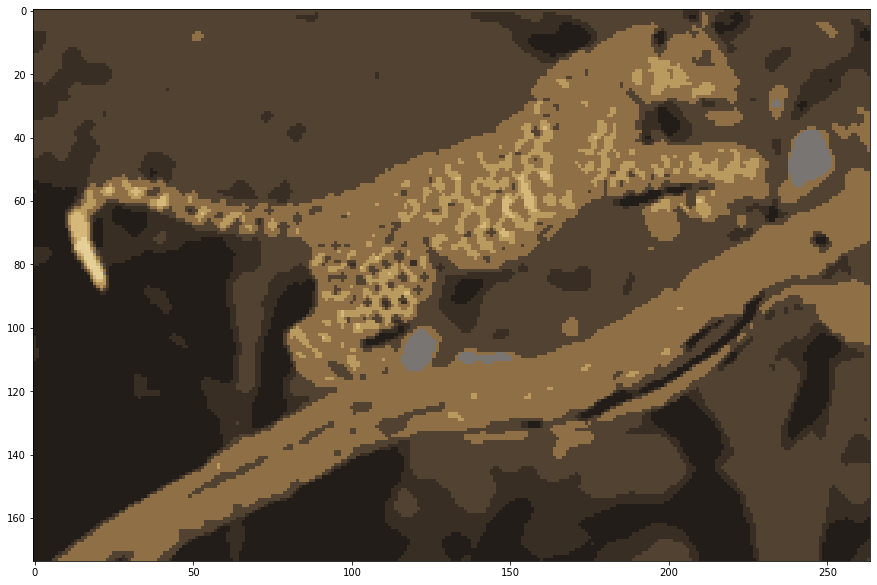

In [ ]:
from sklearn.feature_extraction.image import grid_to_graph
from sklearn.cluster import MeanShift, estimate_bandwidth
img=cv2.pyrDown(pic1_rgb)
img = cv2.medianBlur(img, 3)
vectorized = img.reshape((-1,3))
vectorized = np.float32(vectorized)

bandwidth = estimate_bandwidth(vectorized, quantile=.06, n_samples=3000)
ms = MeanShift(bandwidth=bandwidth, max_iter=800, bin_seeding=True)
ms.fit(vectorized)
labeled=ms.labels_

segments = np.unique(labeled)
print('Number of segments: ', segments.shape[0])

total = np.zeros((segments.shape[0], 3), dtype=float)
count = np.zeros(total.shape, dtype=float)
for i, label in enumerate(labeled):
    total[label] = total[label] + vectorized[i]
    count[label] += 1
avg = total/count
avg = np.uint8(avg)

res = avg[labeled]
result = res.reshape((img.shape))

plt.figure(figsize=(15, 15))
plt.imshow(result)
plt.show()

## EM

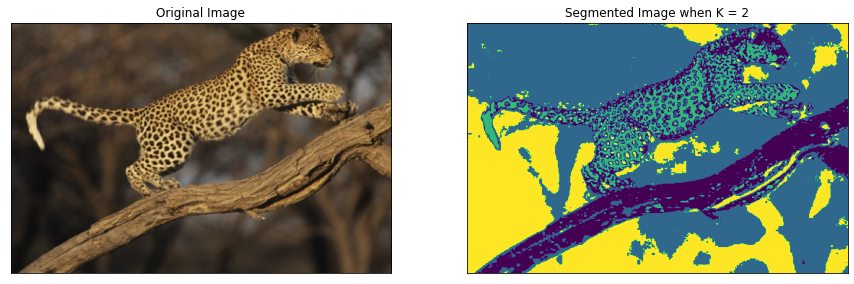

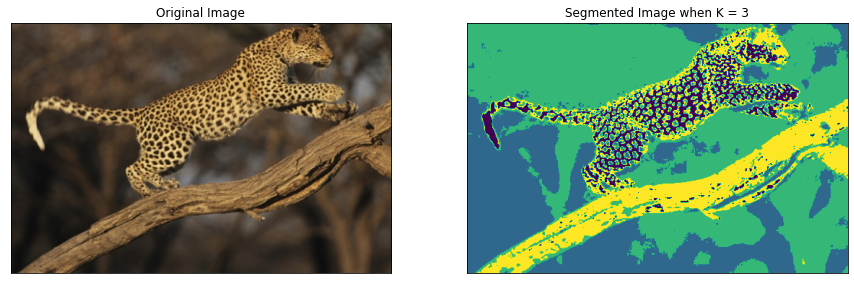

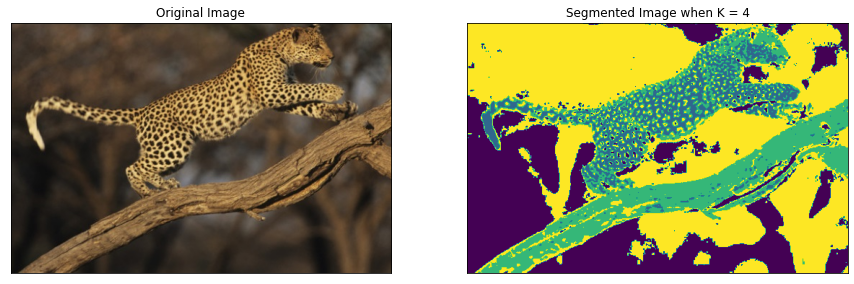

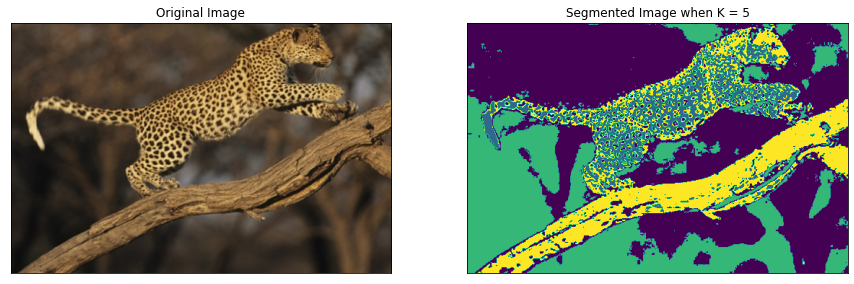

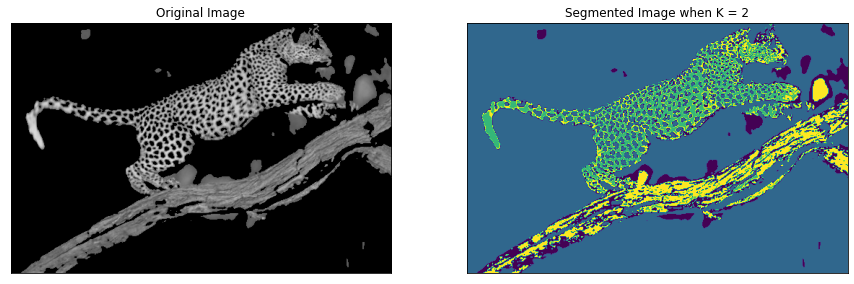

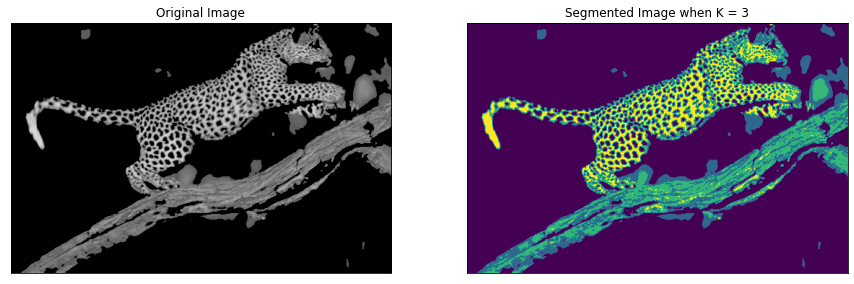

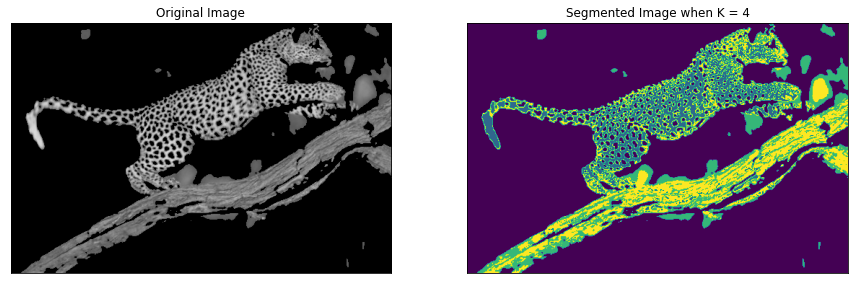

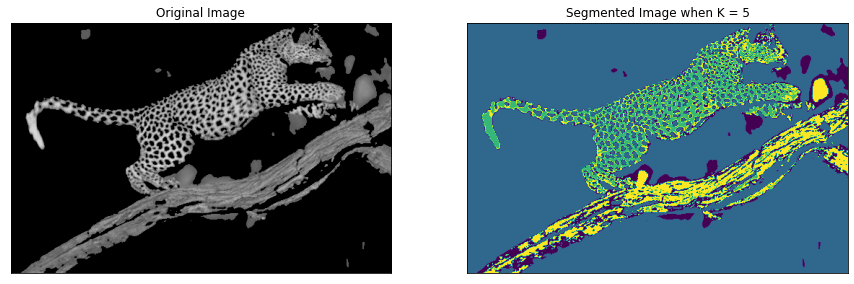

In [ ]:
for img in (pic1_rgb,cv2.cvtColor(sel,cv2.COLOR_GRAY2RGB)):
  vectorized = img.reshape((-1,3))
  from sklearn.mixture import GaussianMixture
  for K in range (2,6):
    model = GaussianMixture(n_components=k,covariance_type='tied').fit(vectorized)
    Label=model.predict(vectorized)
    or_shape=img.shape
    segmented=Label.reshape(or_shape[0],or_shape[1])
    figure_size = 15
    plt.figure(figsize=(figure_size,figure_size))
    plt.subplot(1,2,1),plt.imshow(img)
    plt.title('Original Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(1,2,2),plt.imshow(segmented)
    plt.title('Segmented Image when K = %i' % K), plt.xticks([]), plt.yticks([])
    plt.show()

## Watershed

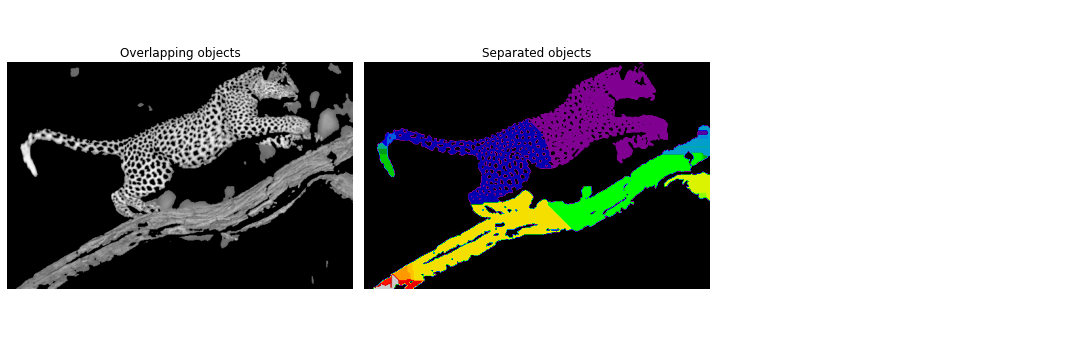

In [ ]:
from skimage.segmentation import watershed
from skimage.feature import peak_local_max
from scipy import ndimage as ndi
image = sel
thresh = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
distance = ndi.distance_transform_edt(thresh)
coords = peak_local_max(distance, footprint=np.ones((3, 3)), labels=image)
mask = np.zeros(distance.shape, dtype=bool)
mask[tuple(coords.T)] = True
markers, _ = ndi.label(mask)
labels = watershed(-distance, markers, mask=image)

fig, axes = plt.subplots(ncols=3, figsize=(15, 5), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Overlapping objects')
ax[1].imshow(labels, cmap=plt.cm.nipy_spectral)
ax[1].set_title('Separated objects')

for a in ax:
    a.set_axis_off()

fig.tight_layout()
plt.show()

## Flood fill

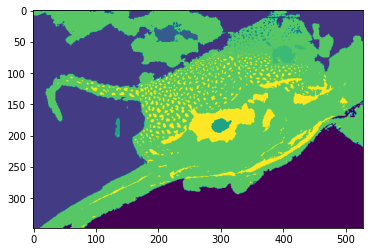

(<matplotlib.image.AxesImage at 0x7f7ffe113bd0>, None)

In [ ]:
image = pic1_g
M, N = image.shape

otsu_threshold, image_result = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU,)

n_objects = 0
for i in range(M):
    for j in range(N):
        if image[i, j] >= otsu_threshold:
            n_objects += 1
            cv2.floodFill(image, None, (j, i), n_objects)

for i in range(M):
    for j in [0, N-1]:
        if image[i, j] >= otsu_threshold:
            cv2.floodFill(image, None, (j, i), 0)
for i in [0, M-1]:
    for j in range(N):
        if image[i, j] >= otsu_threshold:
            cv2.floodFill(image, None, (j, i), 0)

plt.imshow(image),plt.show()

## Grab cut

Obtained threshold:  151.0


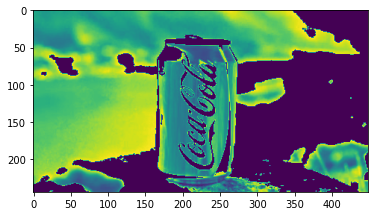

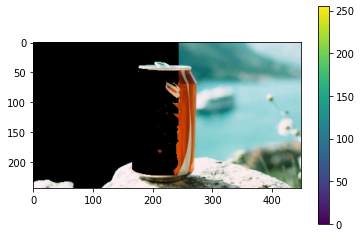

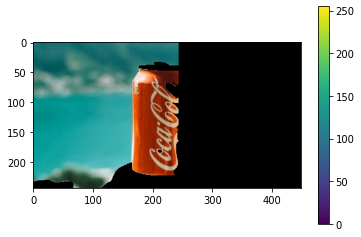

(<matplotlib.image.AxesImage at 0x7f7f947d3a90>,
 None,
 None)

In [ ]:
# img = cv2.erode(pic2_rgb, rect_kernel,iterations = 2)
img = pic2_rgb
image = pic2_g
otsu_threshold, image_result = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU,)
print("Obtained threshold: ", otsu_threshold)

mask = image < otsu_threshold
sel2 = np.zeros_like(image)
sel2[mask] = image[mask]

plt.imshow(sel2),plt.show()

mask = np.zeros(sel2.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (0,0,img.shape[0],img.shape[1])
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==1)|(mask==3),0,1).astype('uint8')
mask3 = np.where((mask==0)|(mask==2),0,1).astype('uint8')
img1 = img*mask2[:,:,np.newaxis]
img2 = img*mask3[:,:,np.newaxis]
plt.imshow(img1),plt.colorbar(),plt.show(),plt.imshow(img2),plt.colorbar(),plt.show()